In [278]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Work with l = 3 inputs for now.

Then f is indexed by a number bewteen 0 and 255 (8-bit strings)

In [360]:
k = 2    # base (i.e. binary)
l = 4    # no. inputs

In [297]:
def bool_func(func_number, x):    # x number between 0 and 7 indicating the inputs of zeros and ones in binary for the 3 input boolean function.
    return (func_number & (1 << x)) >> x

def hamming_pair(x, y):
    # Determines if two numbers are edge connected in Hamming graph of their binary representations.
    z = x ^ y
    return z and not(z & (z-1))

def LZC(input_str):
    # Function to find the LZ complexity of a string.
    keys_dict = {}
    ind = 0
    inc = 1
    while True:
        if ind+inc > len(input_str):
            break
        sub_str = input_str[ind:ind + inc]
        if sub_str in keys_dict:
            inc += 1
        else:
            keys_dict[sub_str] = 0
            ind += inc
            inc = 1
    len1 = len()
    
    input_str_rev = input_str[::-1]
    keys_dict = {}
    ind = 0
    inc = 1
    while True:
        if ind+inc > len(input_str_rev):
            break
        sub_str = input_str_rev[ind:ind + inc]
        if sub_str in keys_dict:
            inc += 1
        else:
            keys_dict[sub_str] = 0
            ind += inc
            inc = 1
    len2 = len(keys_dict)
    
    return np.log2(l)*(len1+len2)/2

In [218]:
func_number = 122
NS = np.zeros((2, 8), dtype=np.int8)

for i in range(8):
    NS[bool_func(func_number, i), i] = 1

G = np.zeros((2, 2), dtype=int)    # Defines neutral set graphs
        

for h in [0, 1]:
    for i, val_i in enumerate(NS[h]):
        if val_i==1:
            G[h,0] = G[h,0] + 1
            for j, val_j in enumerate(NS[h]):
                if val_j==1 and j > i:
                    G[h,1] = G[h,1] + hamming_pair(i, j)
                else:
                    pass
        else:
            pass

In [241]:
r = np.zeros((2), dtype=np.float)

r[0] = (2*G[0,1])/(l*(k-1)*G[0,0])
r[1] = (2*G[1,1])/(l*(k-1)*G[1,0])

r_func = (1/(k**l))*(r[0]*G[0,0] + r[1]*G[1,0])

r_func

0.8

In [295]:
LZC(format(122, '0'+str(k**l)+'b'))
format(122, '0'+str(k**l)+'b')[::-1]

'0101111000000000'

In [367]:
# This code plots the robustness of a neutral set against the frequency

freq_NS = []
rho_NS = []
LZ_NS = []

for func_number in range(k**(k**l)):
    
    NS = np.zeros((2, k**l), dtype=np.int8)
    G = np.zeros((2, 2), dtype=int)    # Defines neutral set graphs
    r = np.zeros((2), dtype=np.float)
    
    for i in range(k**l):
        NS[bool_func(func_number, i), i] = 1
            
    for h in [0, 1]:
        for i, val_i in enumerate(NS[h]):
            if val_i==1:
                G[h,0] = G[h,0] + 1
                for j, val_j in enumerate(NS[h]):
                    if val_j==1 and j > i:
                        G[h,1] = G[h,1] + hamming_pair(i, j)
                    else:
                        pass
            else:
                pass
            
    #bin_func_num = format(func_number, '0'+str(k**l)+'b')
    #complexity = LZC(bin_func_num)
    
    if G[0,0]!=0:
        r[0] = (2*float(G[0,1]))/(l*(k-1)*float(G[0,0]))
        freq0 = G[0,0]
        freq_NS.append(freq0)
        rho_NS.append(r[0])
    else:
        pass
    if G[1,0]!=0:
        r[1] = (2*float(G[1,1]))/(l*(k-1)*float(G[1,0]))
        freq1 = G[1,0]
        freq_NS.append(freq1)
        rho_NS.append(r[1])
    else:
        pass

In [364]:
# This code plots the robustness of neutral components agains the frequency

freq = []
rho = []
LZ = []

for func_number in range(k**(k**l)):
    
    NS = np.zeros((2, k**l), dtype=np.int8)
    G_N0 = {}    # Defines neutral set graphs for output 0
    G_N1 = {}    # Defines neutral set graphs for output 1
    r0 = np.zeros((2), dtype=np.float)
    NC0 = {}
    NC1 = {}
    
    for i in range(k**l):
        NS[bool_func(func_number, i), i] = 1
    
    count0 = 0
    for i, val_i in enumerate(NS[0]):
        if val_i==1:
            com_ind = []           # Keep track of common indices for new binary sequence to check whether disjoint neutral components now join.
            for key in NC0:
                if hamming_pair(i, key):
                    com_ind.append(NC0[key])
            if len(com_ind)>0:
                NC0[i] = min(com_ind)
                for key in NC0:
                    if NC0[key] in com_ind:
                        NC0[key] = min(com_ind)
            else:
                NC0[i] = count0
                count0 += 1
                
    count1 = 0
    for i, val_i in enumerate(NS[1]):
        if val_i==1:
            com_ind = []           # Keep track of common indices for new binary sequence to check whether disjoint neutral components now join.
            for key in NC1:
                if hamming_pair(i, key):
                    com_ind.append(NC1[key])
            if len(com_ind)>0:
                NC1[i] = min(com_ind)
                for key in NC1:
                    if NC1[key] in com_ind:
                        NC1[key] = min(com_ind)
            else:
                NC1[i] = count1
                count1 += 1
    
    
    ind0 = sorted(set(NC0.values()))
    ind1 = sorted(set(NC1.values()))
    
    for val in ind0:
        G_N0[val] = [0,0]
        for key_i in NC0:
            if NC0[key_i] == val:
                G_N0[val][0] += 1
                for key_j in NC0:
                    if NC0[key_j] == val and key_j > key_i:
                        G_N0[val][1] = G_N0[val][1] + hamming_pair(key_i, key_j)
                    else:
                        pass
            else:
                pass
    
    for val in ind1:
        G_N1[val] = [0,0]
        for key_i in NC1:
            if NC1[key_i] == val:
                G_N1[val][0] += 1
                for key_j in NC1:
                    if NC1[key_j] == val and key_j > key_i:
                        G_N1[val][1] = G_N1[val][1] + hamming_pair(key_i, key_j)
                    else:
                        pass
            else:
                pass  
            
    #bin_func_num = format(func_number, '0'+str(k**l)+'b')
    #complexity = LZC(bin_func_num)
    
    for key in G_N0:
        rho0 = (2*float(G_N0[key][1]))/(l*(k-1)*float(G_N0[key][0]))
        rho.append(rho0)
        freq0 = G_N0[key][0]
        freq.append(freq0)
    for key in G_N1:
        rho1 = (2*float(G_N1[key][1]))/(l*(k-1)*float(G_N1[key][0]))
        rho.append(rho1)
        freq1 = G_N1[key][0]
        freq.append(freq1)

In [365]:
freq_np = np.array(freq)
freq_log2 = np.log2(freq_np/(k**l))

logF_cont = pd.read_csv('logF_continuous.txt', header=None)
rho_blancmange = pd.read_csv('rho_blancmange.txt', header=None)
rho_1comp_min = pd.read_csv('rho_1comp_min.txt', header=None)
rho_lower = pd.read_csv('rho_lower.txt', header=None)
rho_upper = pd.read_csv('rho_upper.txt', header=None)
rho_null = pd.read_csv('rho_null.txt', header=None)

np.size(rho)

211626

Text(0, 0.5, 'Robustness')

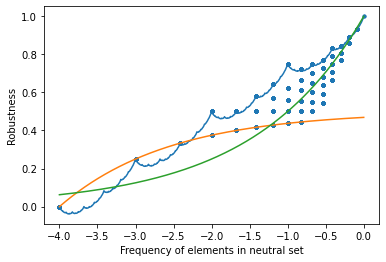

In [366]:
plt.plot(logF_cont, blancmange)
plt.plot(logF_cont, rho_1comp_min)
plt.plot(logF_cont, rho_null)
plt.scatter(freq_log2, rho, marker='.')
plt.xlabel('Frequency of elements in neutral set')
plt.ylabel('Robustness')

In [301]:
k**(k**l)

65536

In [307]:
for i in range(1):
    print(i)

0


In [314]:
np.sum([[0,1,2],
     [3,0,1]])

7

In [350]:
a = {}
a[1] = [1,2]
a[2] = [2,3]

In [333]:
sorted(set([4,6,3,4]))

[3, 4, 6]

In [351]:
a[1][0] += 1
a[1]

[2, 2]

In [2]:
import torch
print(torch.__version__)

2.1.0+cpu
